In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense , Dropout
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
no_ub = pd.read_csv("empty.csv")
print(no_ub.isnull().sum())
no_ub.head()

Unnamed: 0    0
Time          0
RPM           0
ACCx          0
ACCy          0
ACCz          0
dtype: int64


,Unnamed: 0,Time,RPM,ACCx,ACCy,ACCz
0,0,51518.0,74.0,0.35,-1.92,0.991285
1,1,51622.0,74.0,0.43,-0.82,0.953159
2,2,51724.0,74.0,0.24,-0.98,0.966231
3,3,51827.0,74.0,0.24,-1.37,0.966231
4,4,51927.0,74.0,0.43,-1.88,1.000000


In [3]:
no_ub = no_ub.drop("Unnamed: 0",axis=1)
#no_ub = no_ub.set_index("Time")
no_ub['Time'] = pd.to_datetime(no_ub['Time'], unit='ms').dt.strftime('%M:%S')
no_ub.head()

,Time,RPM,ACCx,ACCy,ACCz
0,00:51,74.0,0.35,-1.92,0.991285
1,00:51,74.0,0.43,-0.82,0.953159
2,00:51,74.0,0.24,-0.98,0.966231
3,00:51,74.0,0.24,-1.37,0.966231
4,00:51,74.0,0.43,-1.88,1.000000


In [4]:
ub400 = pd.read_csv("400un.csv")
print(ub400.isnull().sum())
ub400.head()

Unnamed: 0    0
Time          0
RPM           0
ACCx          0
ACCy          0
ACCz          0
dtype: int64


,Unnamed: 0,Time,RPM,ACCx,ACCy,ACCz
0,0,54427.0,69.0,0.31,-1.10,0.995643
1,1,54529.0,69.0,0.24,-0.98,1.013072
2,2,54632.0,69.0,0.35,-0.75,0.995643
3,3,54734.0,69.0,0.27,-0.24,0.931373
4,4,54837.0,69.0,0.31,-1.53,1.038126


In [5]:
ub400 = ub400.drop("Unnamed: 0",axis=1)
#ub400 = ub400.set_index("Time")
ub400.head()

,Time,RPM,ACCx,ACCy,ACCz
0,54427.0,69.0,0.31,-1.10,0.995643
1,54529.0,69.0,0.24,-0.98,1.013072
2,54632.0,69.0,0.35,-0.75,0.995643
3,54734.0,69.0,0.27,-0.24,0.931373
4,54837.0,69.0,0.31,-1.53,1.038126


In [6]:
ub400['Time'] = pd.to_datetime(ub400['Time'], unit='ms').dt.strftime('%M:%S')
ub400.head()

,Time,RPM,ACCx,ACCy,ACCz
0,00:54,69.0,0.31,-1.10,0.995643
1,00:54,69.0,0.24,-0.98,1.013072
2,00:54,69.0,0.35,-0.75,0.995643
3,00:54,69.0,0.27,-0.24,0.931373
4,00:54,69.0,0.31,-1.53,1.038126


In [7]:
threshold = 1000
filtered_rows = no_ub[(no_ub['RPM'] > threshold)]
print("Rows with RPM above the threshold:")
print(filtered_rows)

Rows with RPM above the threshold:
        Time     RPM  ACCx  ACCy      ACCz
25114  15:45  6000.0  0.20 -1.65  0.969499
27093  16:55  6000.0  0.27 -2.00  0.995643
27094  16:55  6000.0  0.27 -2.00  0.995643
27484  17:09  6000.0 -0.04 -1.53  0.961874
27485  17:09  6000.0 -0.04 -1.53  0.961874
29071  18:05  6000.0  0.59 -3.84  1.000000
29072  18:05  6000.0  0.59 -3.84  1.000000
31489  19:30  6000.0  0.39 -1.57  0.986928
31490  19:30  6000.0  0.39 -1.57  0.986928
31701  19:37  6000.0  0.31 -1.45  0.986928
31702  19:37  6000.0  0.31 -1.45  0.986928


In [8]:
no_ub = no_ub.drop(filtered_rows.index)

In [9]:
print(no_ub[no_ub["RPM"]==max(no_ub["RPM"])])

        Time    RPM  ACCx  ACCy      ACCz
15708  10:05  932.0 -0.94 -5.10  0.657952
15712  10:05  932.0 -0.94 -5.10  0.657952
15717  10:05  932.0 -0.94 -5.10  0.657952
15720  10:05  932.0 -0.94 -5.10  0.657952
15735  10:06  932.0 -0.82 -2.20  0.542484
16298  10:36  932.0  0.39 -1.18  0.640523
16421  10:40  932.0  1.29  1.02  1.295207
16422  10:40  932.0  0.78 -2.55  0.555556
16423  10:40  932.0  1.22 -1.53  1.342048
16424  10:40  932.0  0.24 -0.31  0.598039
16425  10:40  932.0  0.16 -3.61  1.235294
16426  10:40  932.0 -1.06  1.41  0.953159
16427  10:40  932.0 -0.75 -5.65  0.982571
16428  10:40  932.0  0.47  1.26  1.191721
16429  10:40  932.0 -0.04 -0.94  0.632898
16430  10:41  932.0  0.43 -3.69  1.342048
16569  10:45  932.0  0.31 -2.63  0.555556
16570  10:45  932.0  0.78 -0.94  1.350763
16571  10:45  932.0 -0.39 -0.94  0.624183
16572  10:45  932.0  0.04 -3.69  1.324619
16573  10:45  932.0 -1.22  1.49  0.858388
16574  10:45  932.0 -0.75 -5.57  1.021786
16575  10:45  932.0  0.59  1.02  1

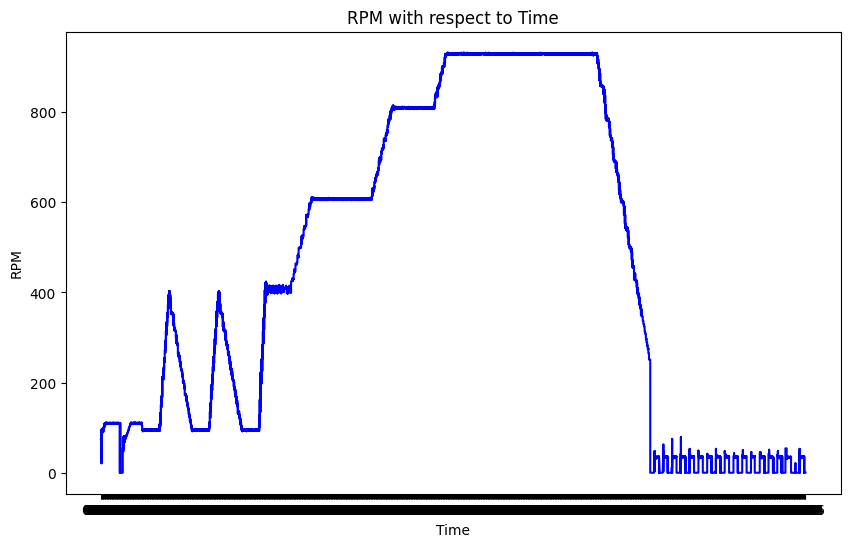

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(no_ub['Time'], no_ub['RPM'], color='b')
plt.title('RPM with respect to Time')
plt.xlabel('Time')
plt.ylabel('RPM')
plt.show()

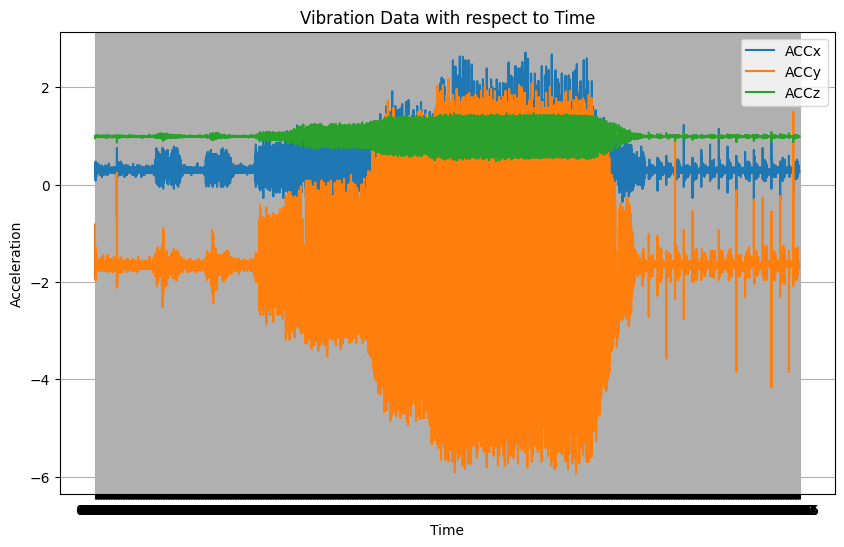

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(no_ub['Time'], no_ub['ACCx'], label='ACCx')
plt.plot(no_ub['Time'], no_ub['ACCy'], label='ACCy')
plt.plot(no_ub['Time'], no_ub['ACCz'], label='ACCz')
plt.title('Vibration Data with respect to Time')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
threshold = 1000
filtered_rows2 = ub400[(ub400['RPM'] > threshold)]
print("Rows with RPM above the threshold:")
print(filtered_rows2)

Rows with RPM above the threshold:
        Time     RPM  ACCx  ACCy      ACCz
20     00:55  6000.0  0.20 -1.22  1.017429
2974   02:39  6000.0  0.31 -1.02  1.004357
2975   02:39  6000.0  0.31 -1.02  1.000000
2976   02:39  6000.0  0.27 -1.02  1.000000
2977   02:39  6000.0  0.31 -1.06  1.004357
2978   02:39  6000.0  0.27 -1.06  1.008715
2979   02:39  6000.0  0.27 -1.37  0.991285
2980   02:39  6000.0  0.16  1.61  0.807190
2981   02:39  6000.0  0.31 -1.45  1.064270
2982   02:39  6000.0  0.39 -0.59  0.978214
2983   02:40  6000.0  0.24 -1.22  1.008715
2984   02:40  6000.0  0.24 -1.22  1.008715
6970   04:59  6000.0  0.43 -0.98  1.004357
6971   04:59  6000.0  0.43 -0.98  1.004357
8939   06:09  6000.0  0.27 -1.10  1.025054
8940   06:09  6000.0  0.27 -1.10  1.025054
11889  07:53  6000.0  0.16 -0.51  0.973856
11890  07:53  6000.0  0.16 -0.51  0.973856
12893  08:28  6000.0  0.98 -0.98  1.059913
12894  08:28  6000.0  0.98 -0.98  1.059913


In [13]:
ub400 = ub400.drop(filtered_rows2.index)

In [14]:
print(ub400[ub400["RPM"]==max(ub400["RPM"])])

        Time    RPM  ACCx   ACCy      ACCz
28145  17:26  932.0 -2.00  13.57  2.444444
28797  17:48  932.0  1.92 -20.91  0.846405
31606  19:27  932.0  0.39  19.65  0.568627
32551  20:01  932.0  0.71 -21.06  1.636166
32901  20:13  932.0 -1.02  -0.75  3.324619


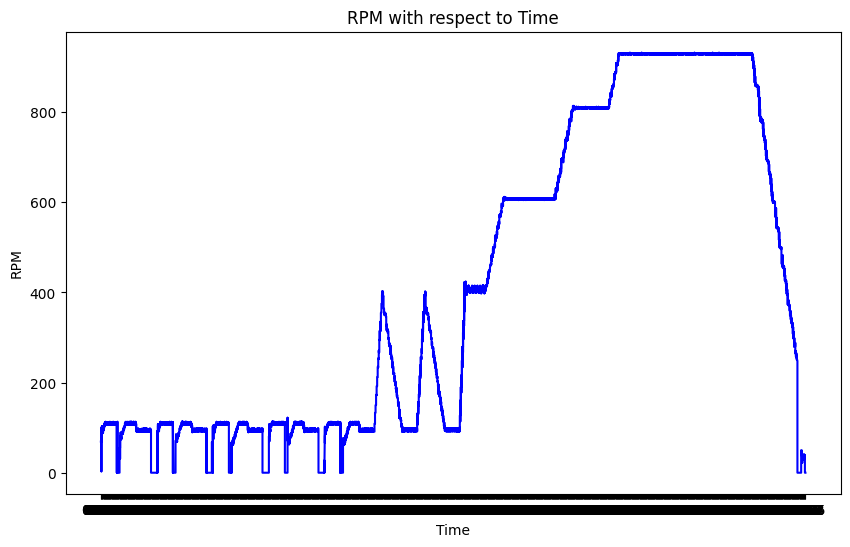

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(ub400['Time'], ub400['RPM'], color='b')
plt.title('RPM with respect to Time')
plt.xlabel('Time')
plt.ylabel('RPM')
plt.show()

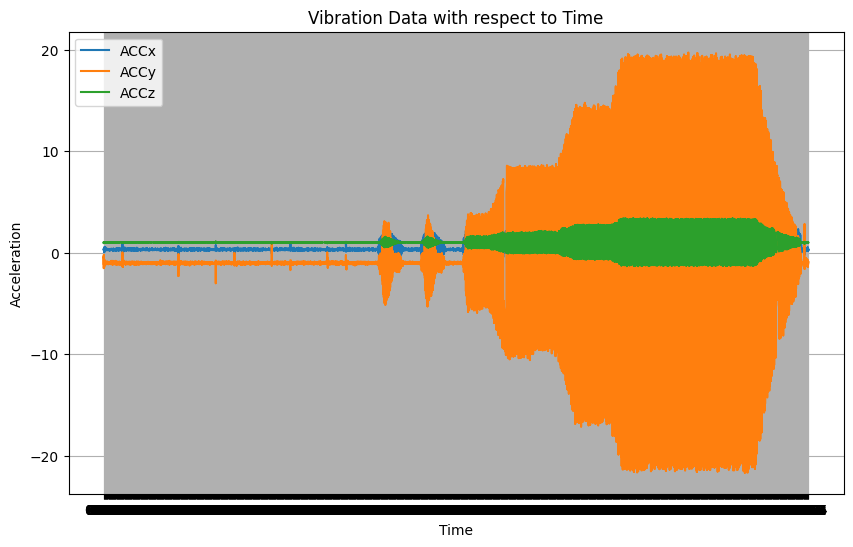

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(ub400['Time'], ub400['ACCx'], label='ACCx')
plt.plot(ub400['Time'], ub400['ACCy'], label='ACCy')
plt.plot(ub400['Time'], ub400['ACCz'], label='ACCz')
plt.title('Vibration Data with respect to Time')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)
plt.show()

Unnamed: 0    0
Time          0
RPM           0
ACCx          0
ACCy          0
ACCz          0
dtype: int64
Rows with RPM above the threshold:
        Time     RPM  ACCx  ACCy      ACCz
0      00:55  6000.0  0.63 -0.67  0.982571
1      00:55  6000.0  0.63 -0.67  0.982571
1026   01:30  6000.0  0.90 -1.96  1.093682
1027   01:30  6000.0  0.90 -1.96  1.093682
6022   04:25  6000.0  0.63 -1.22  1.000000
6023   04:25  6000.0  0.63 -1.22  1.000000
9011   06:10  6000.0  0.51 -1.10  1.004357
9012   06:10  6000.0  0.51 -1.10  1.004357
11974  07:55  6000.0  0.27 -1.22  1.025054
11975  07:55  6000.0  0.27 -1.22  1.025054
12955  08:30  6000.0  0.16 -1.57  1.051198
12956  08:30  6000.0  0.16 -1.57  1.051198
17971  11:25  6000.0  0.24 -1.69  1.013072
17972  11:25  6000.0  0.24 -1.69  1.013072
23947  14:55  6000.0  0.20 -0.63  0.969499
23948  14:55  6000.0  0.20 -0.63  0.969499
        Time    RPM  ACCx  ACCy      ACCz
18942  11:59  133.0  0.24 -1.06  1.008715
18943  11:59  133.0  0.35 -0.98  1.004357

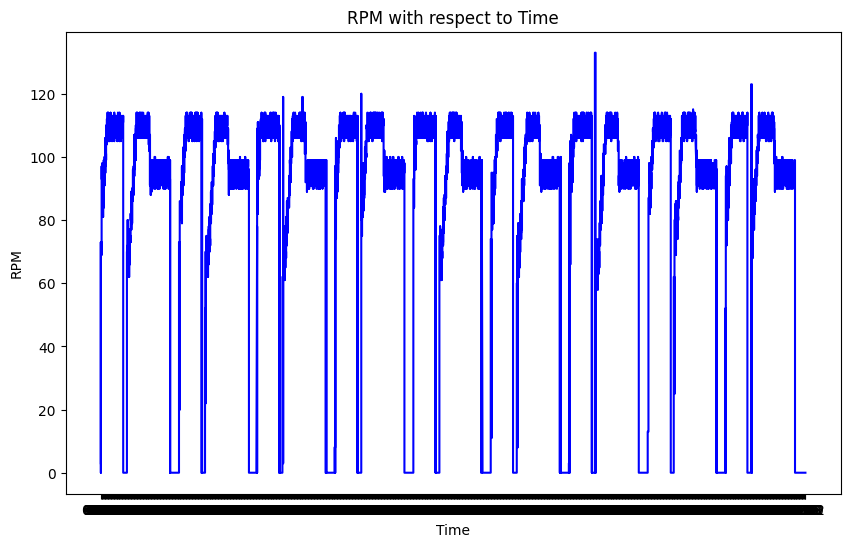

In [17]:
ub650 = pd.read_csv("650un.csv")
print(ub650.isnull().sum())
ub650 = ub650.drop("Unnamed: 0",axis=1)
ub650['Time'] = pd.to_datetime(ub650['Time'], unit='ms').dt.strftime('%M:%S')
threshold = 1000
filtered_rows = ub650[(ub650['RPM'] > threshold)]
print("Rows with RPM above the threshold:")
print(filtered_rows)
ub650 = ub650.drop(filtered_rows.index)
print(ub650[ub650["RPM"]==max(ub650["RPM"])])
plt.figure(figsize=(10, 6))
plt.plot(ub650['Time'], ub650['RPM'], color='b')
plt.title('RPM with respect to Time')
plt.xlabel('Time')
plt.ylabel('RPM')
plt.show()

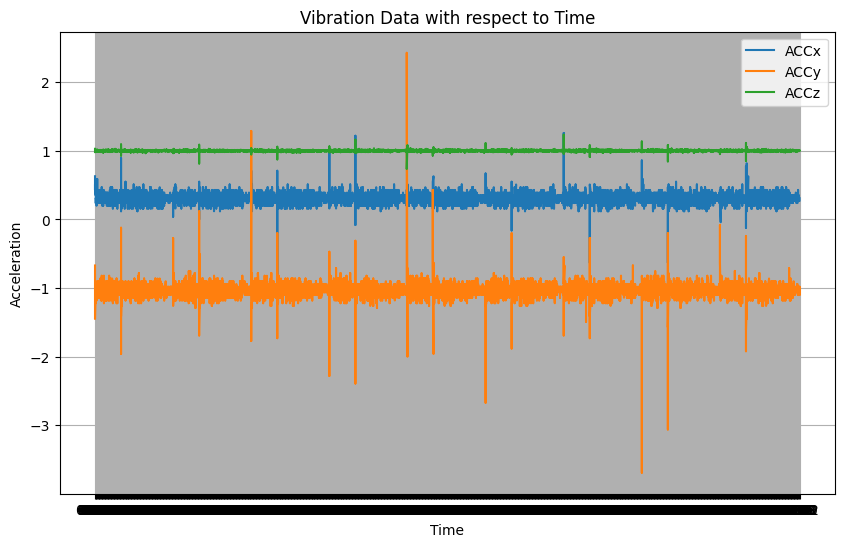

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(ub650['Time'], ub650['ACCx'], label='ACCx')
plt.plot(ub650['Time'], ub650['ACCy'], label='ACCy')
plt.plot(ub650['Time'], ub650['ACCz'], label='ACCz')
plt.title('Vibration Data with respect to Time')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 1433.509128616567


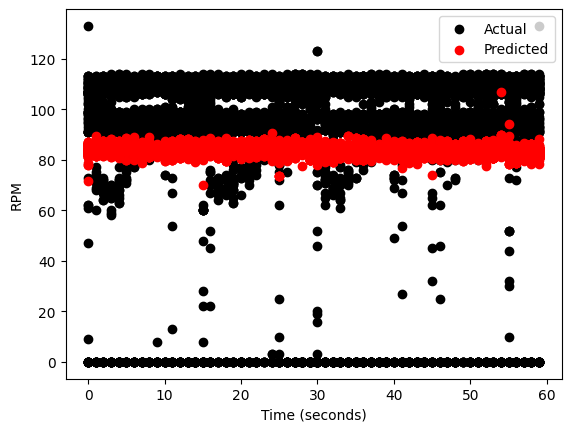

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
features = ['Time', 'ACCx', 'ACCy', 'ACCz']

target = 'RPM'

ub650['Time'] = pd.to_datetime(ub650['Time'], format='%M:%S').dt.second

X = ub650[features]
y = ub650[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.scatter(X_test['Time'], y_test, color='black', label='Actual')
plt.scatter(X_test['Time'], y_pred, color='red', label='Predicted')
plt.xlabel('Time (seconds)')
plt.ylabel('RPM')
plt.legend()
plt.show()


In [21]:
print(ub650[ub650["RPM"]==max(ub650["RPM"])])

       Time    RPM  ACCx  ACCy      ACCz
18942    59  133.0  0.24 -1.06  1.008715
18943    59  133.0  0.35 -0.98  1.004357
18944    59  133.0  0.27 -0.94  1.000000
18945    59  133.0  0.27 -1.02  1.000000
18946    59  133.0  0.27 -0.98  0.995643
18947    59  133.0  0.35 -1.06  1.008715
18948     0  133.0  0.27 -0.94  0.995643
18949     0  133.0  0.27 -1.02  1.000000
18950     0  133.0  0.24 -0.63  0.982571
18951     0  133.0  0.27 -1.02  1.021786
18952     0  133.0 -0.63 -0.27  0.910675
18953     0  133.0 -0.63 -0.27  0.910675
